<a href="https://colab.research.google.com/github/amalsunfiya/MECHINE-LEARNING-PROJECT/blob/main/HEART_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Charter
>**TITLE :**
**Heart Disease Prediction**

>**AIM :** To analyze and predict the result whether the patient has heart disease or normal

>**KEY TAKEAWAYS :**
* This process involves data cleaning, data statistics, getting insights from the dataset.
* This involves four machine learning algorithms which will result in performance metrics of the model.
* The well-doing algorithm is implemented in the model and checking results with the real-time data.

>**DATASET :** https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')


#Import dataset

In [ ]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

In [ ]:
df.shape

(270, 14)

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
df.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


#Data Cleaning

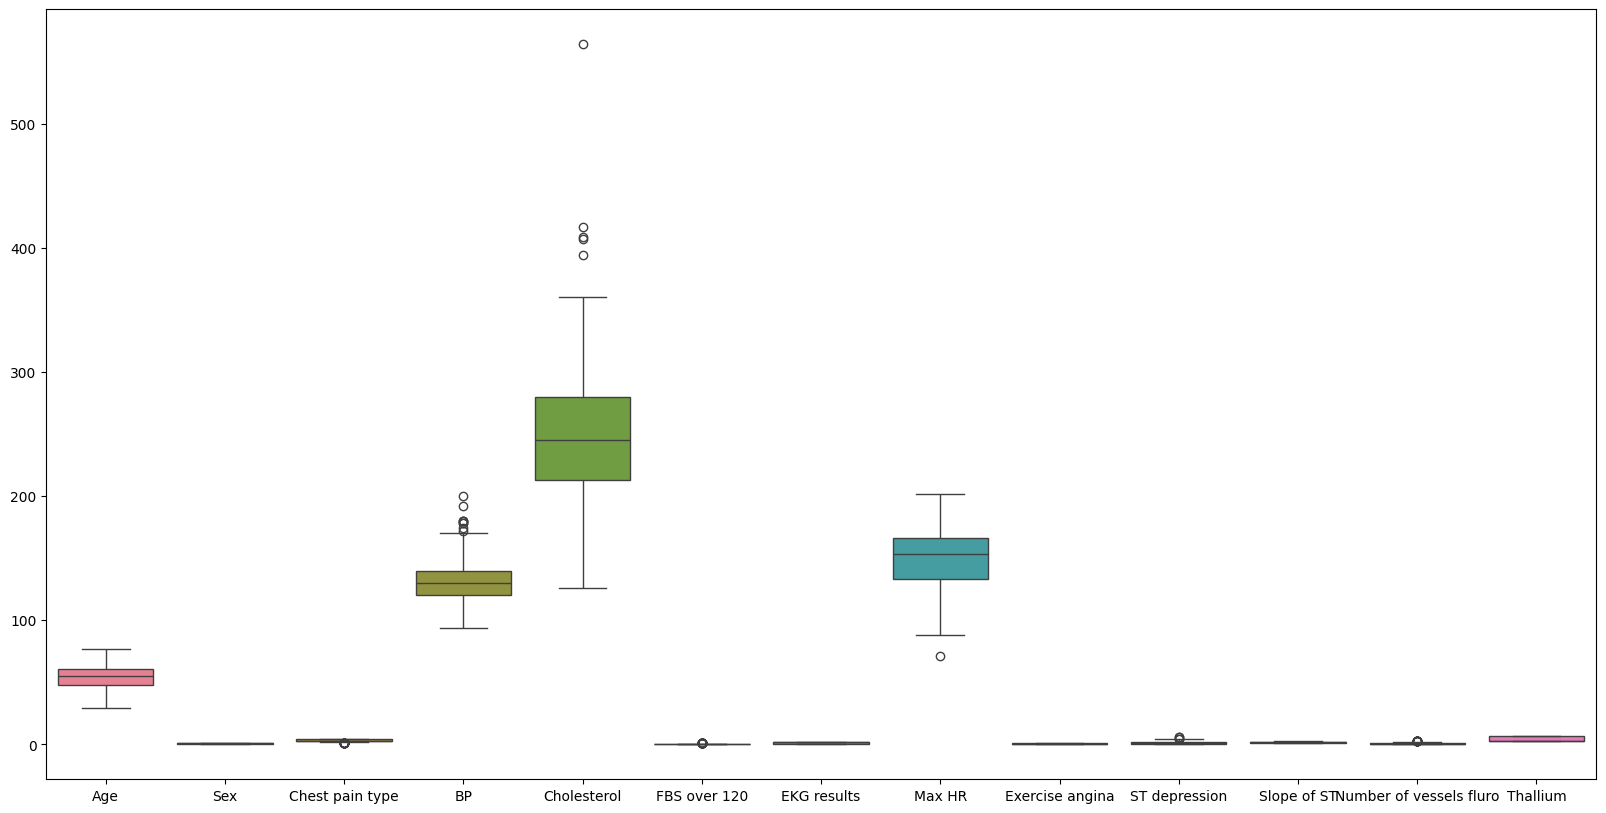

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.show()

In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers = find_outliers_IQR(df['BP'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 9
max outlier value: 200
min outlier value: 172


,BP
58,174
87,178
110,180
117,200
144,192
159,178
165,180
240,180
265,172


In [ ]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = outliers.dropna().reset_index()
   return outliers_dropped

In [ ]:
upper_limit = df['BP'].mean() + 3*df["BP"].std()

print(upper_limit)

lower_limit = df['BP'].mean() - 3*df["BP"].std()

print(lower_limit)
df['BP'] = np.where(df['BP'] > upper_limit,

   upper_limit,

   np.where(df['BP'] < lower_limit, lower_limit, df['BP'] ))

184.929269322847
77.75961956604186


In [ ]:
df.describe()[['BP']]

,BP
count,270.000000
mean,131.262439
std,17.583485
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,184.929269


In [ ]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   df = np.where(df > upper,
       df.mean(),
       np.where(
           df < lower,
           df.mean(),
           df
           ))
   return df

In [ ]:
df['BP'] = impute_outliers_IQR(df['BP'])

df.describe()['BP']

,BP
count,270.000000
mean,129.668007
std,15.150004
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,170.000000


<Axes: ylabel='BP'>

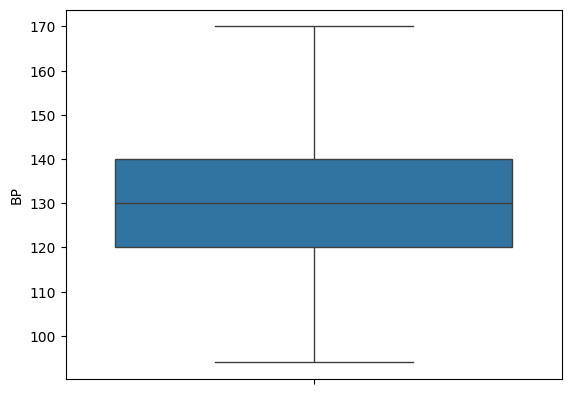

In [ ]:
sns.boxplot(df['BP'])

<Axes: ylabel='Cholesterol'>

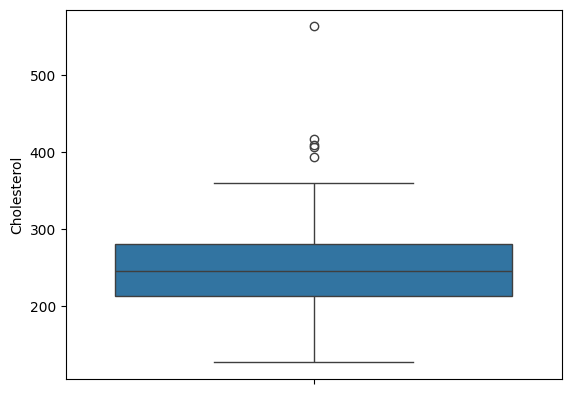

In [ ]:
sns.boxplot(df['Cholesterol'])

#Data Visualization

    Target variable -> 'Heart Disease'

In [ ]:
df['Heart Disease']

,Heart Disease
0,Presence
1,Absence
2,Presence
3,Absence
4,Absence
...,...
265,Absence
266,Absence
267,Absence
268,Absence


In [ ]:
df.rename(columns = {'Heart Disease':'target'}, inplace = True)
df['target'].value_counts()

,count
target,
Absence,150
Presence,120


<Axes: xlabel='target'>

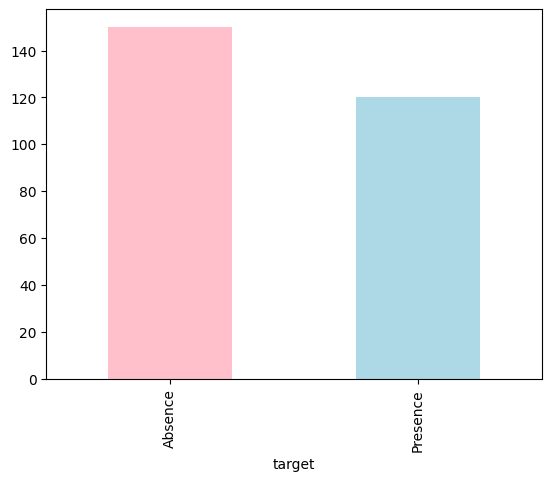

In [ ]:
df['target'].value_counts().plot(kind='bar', color=["pink","lightblue"])

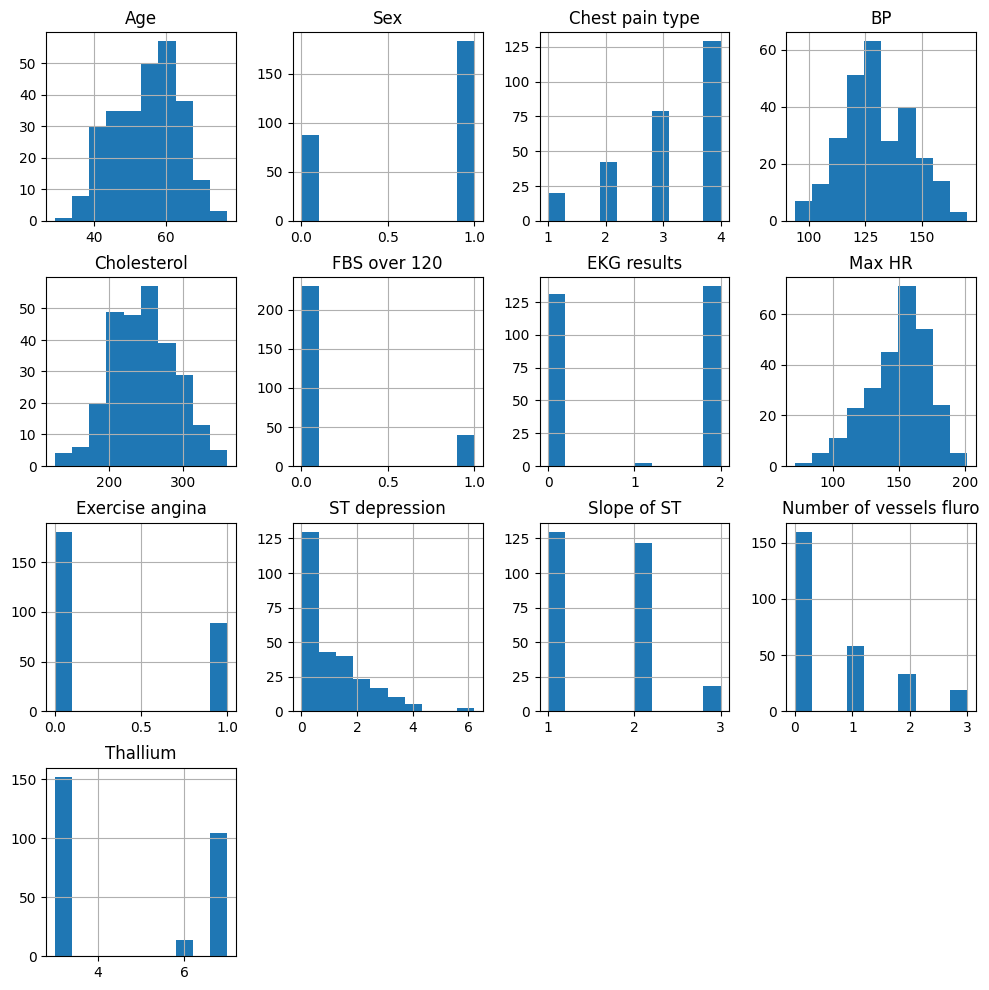

In [ ]:
df.hist(figsize=(12,12))
plt.savefig('Histogram for separate features')

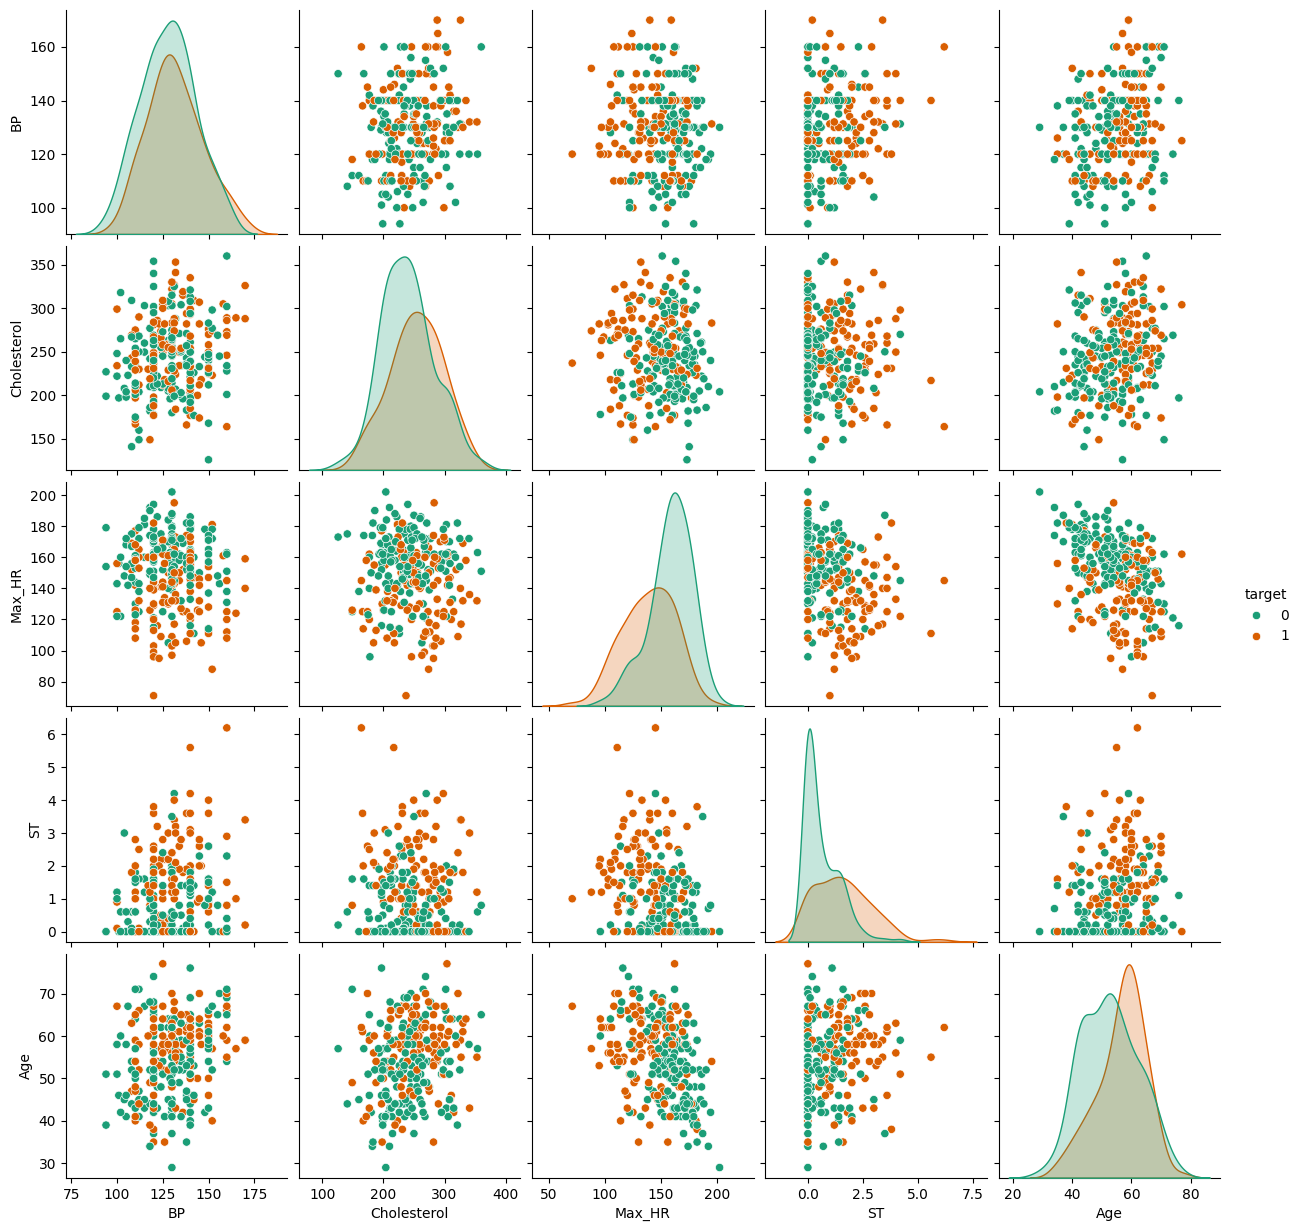

In [ ]:
sns.pairplot(df[['BP','Cholesterol','Max_HR','ST','Age', 'target']],hue='target', palette='Dark2');

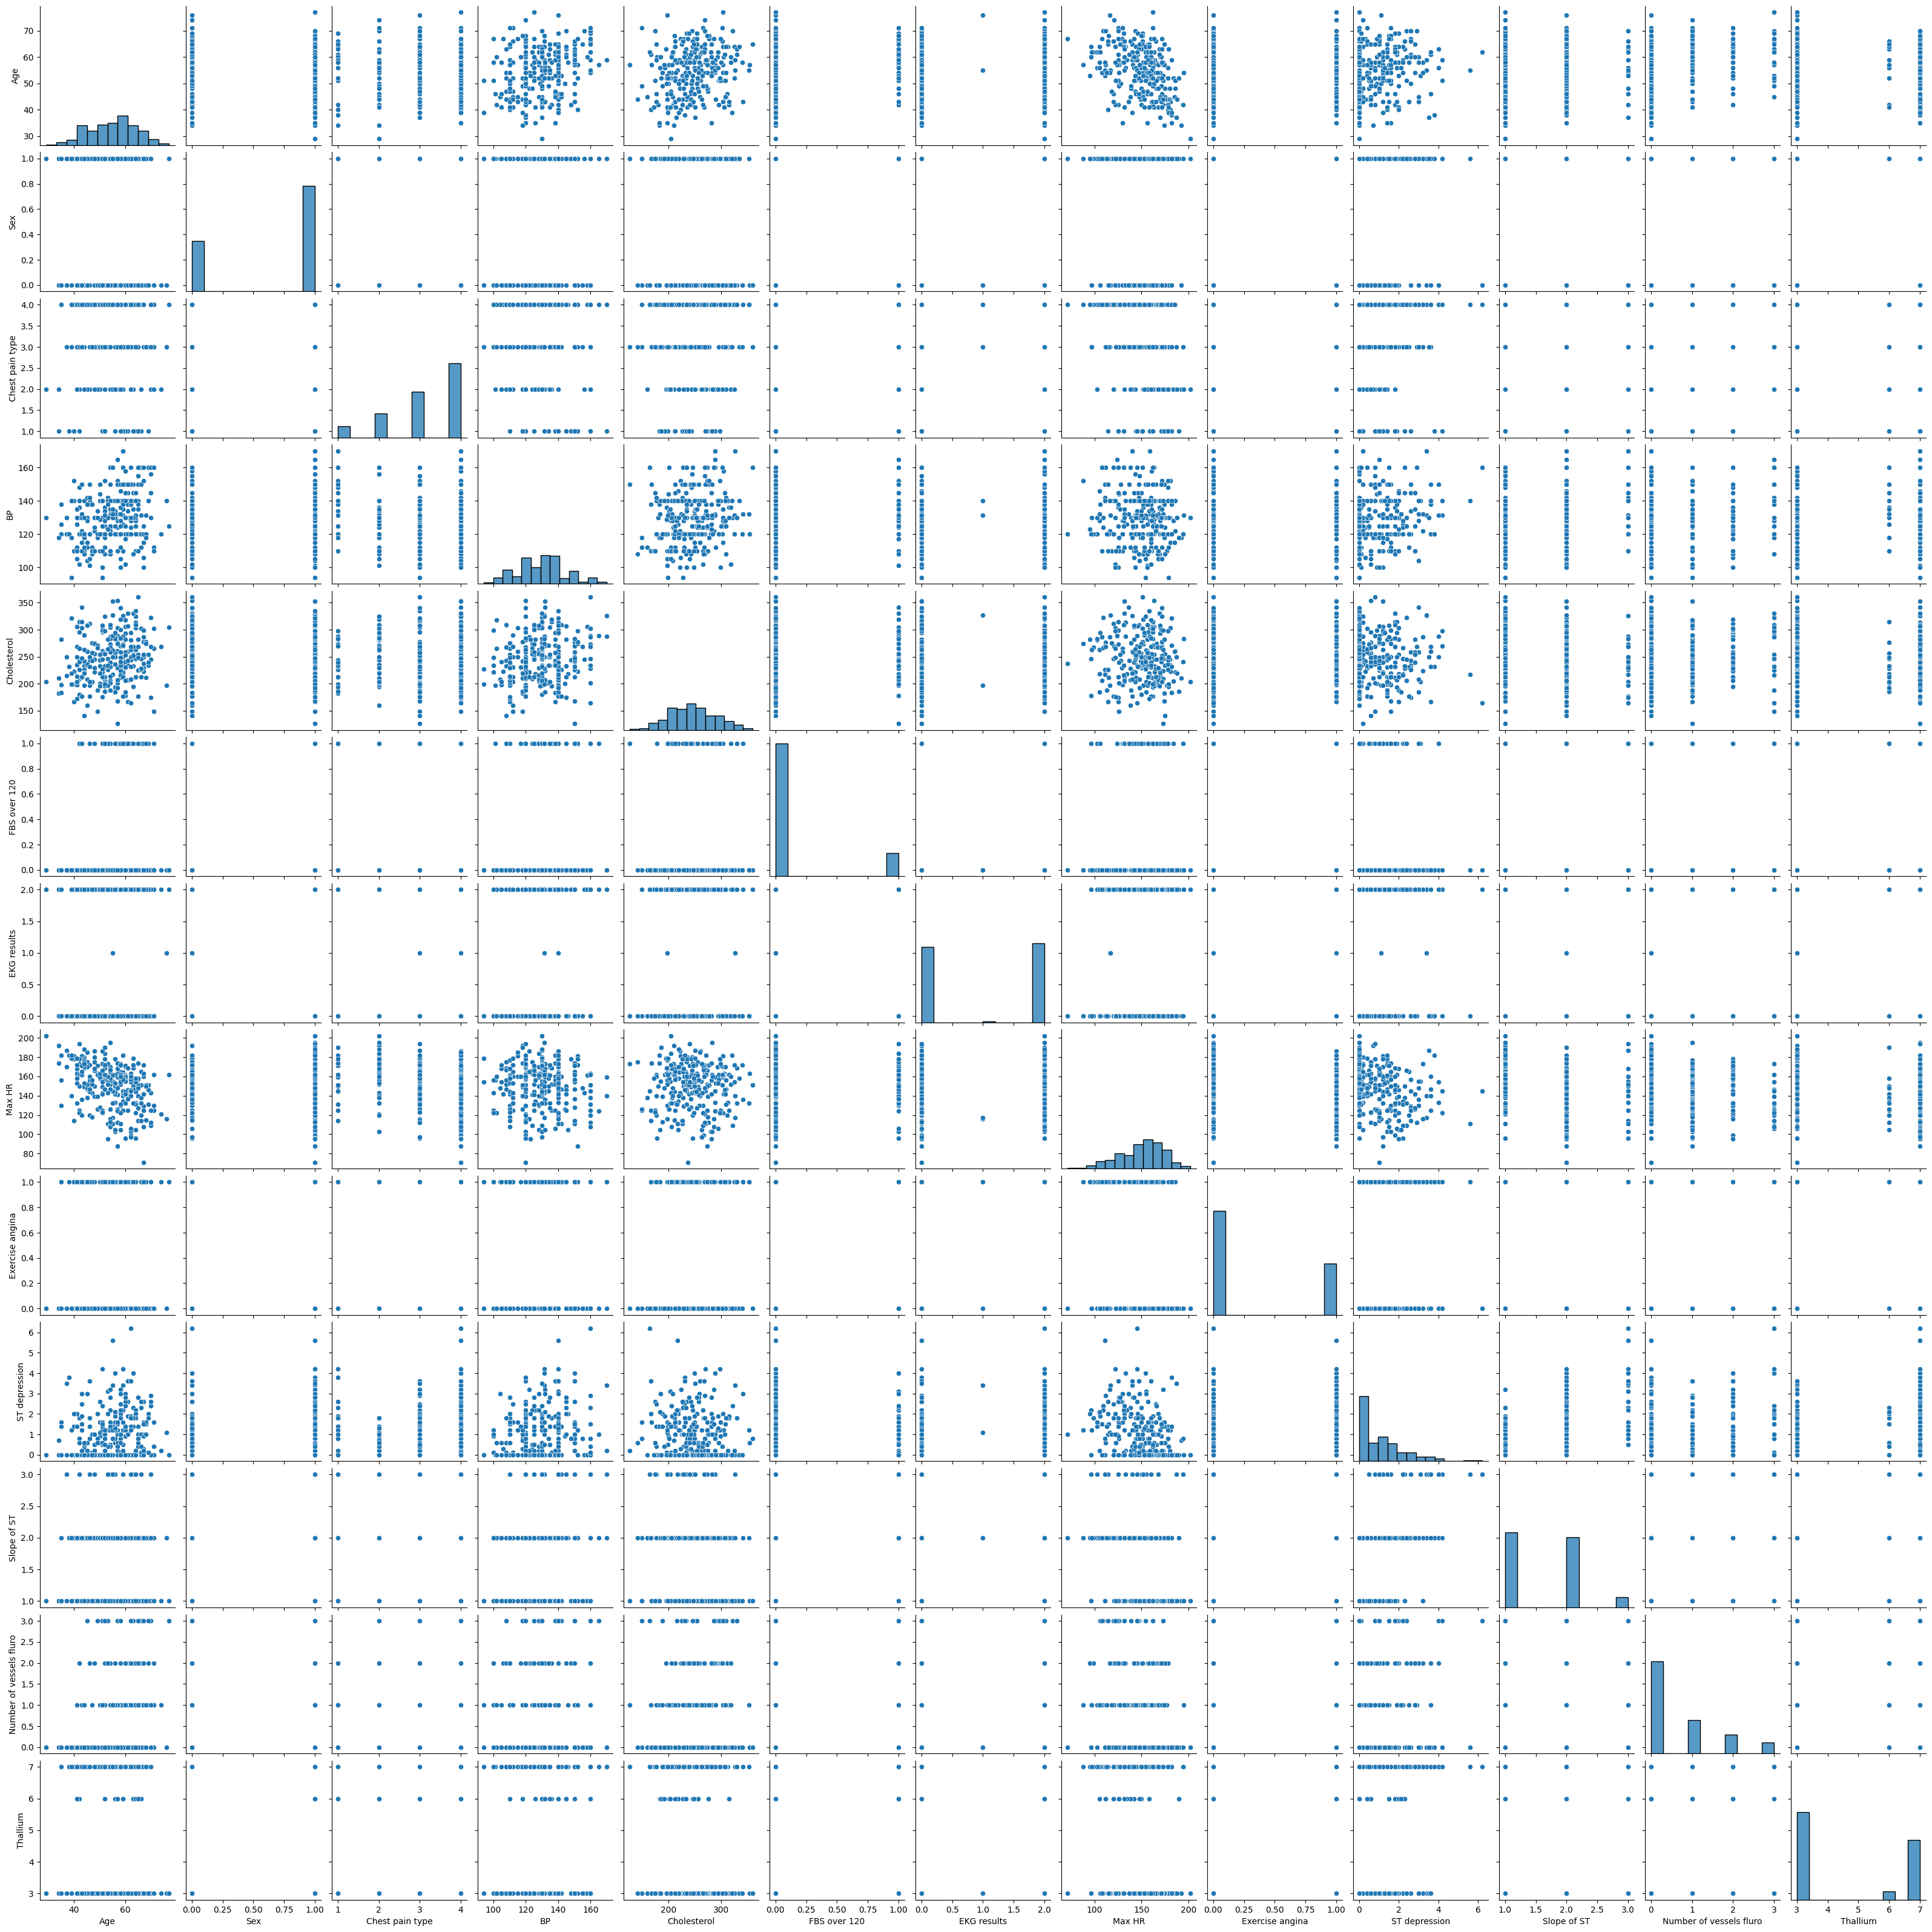

In [ ]:
sns.pairplot(df)

CORRELATION STUDY

In [ ]:
df.corr()

,Age,Sex,CP_type,BP,Cholesterol,FBS,EKG,Max_HR,ST,ST_slope,Thallium,target
Age,1.000000,-0.094401,0.096920,0.265719,0.181075,0.123458,0.128171,-0.402215,0.194234,0.159774,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.016349,-0.121953,0.042140,0.039253,-0.076101,0.097412,0.050545,0.391046,0.297721
CP_type,0.096920,0.034636,1.000000,-0.056786,0.080114,-0.098537,0.074325,-0.317682,0.167244,0.136900,0.262659,0.417436
BP,0.265719,-0.016349,-0.056786,1.000000,0.164102,0.088476,0.128110,-0.056247,0.196947,0.106857,0.094748,0.126386
Cholesterol,0.181075,-0.121953,0.080114,0.164102,1.000000,0.023086,0.119268,-0.044978,-0.023023,-0.037641,-0.006416,0.156487
FBS,0.123458,0.042140,-0.098537,0.088476,0.023086,1.000000,0.053499,0.022494,-0.025538,0.044076,0.049237,-0.016319
EKG,0.128171,0.039253,0.074325,0.128110,0.119268,0.053499,1.000000,-0.074628,0.120034,0.160614,0.007337,0.182091
Max_HR,-0.402215,-0.076101,-0.317682,-0.056247,-0.044978,0.022494,-0.074628,1.000000,-0.349045,-0.386847,-0.253397,-0.418514
ST,0.194234,0.097412,0.167244,0.196947,-0.023023,-0.025538,0.120034,-0.349045,1.000000,0.609712,0.324333,0.417967
ST_slope,0.159774,0.050545,0.136900,0.106857,-0.037641,0.044076,0.160614,-0.386847,0.609712,1.000000,0.283678,0.337616


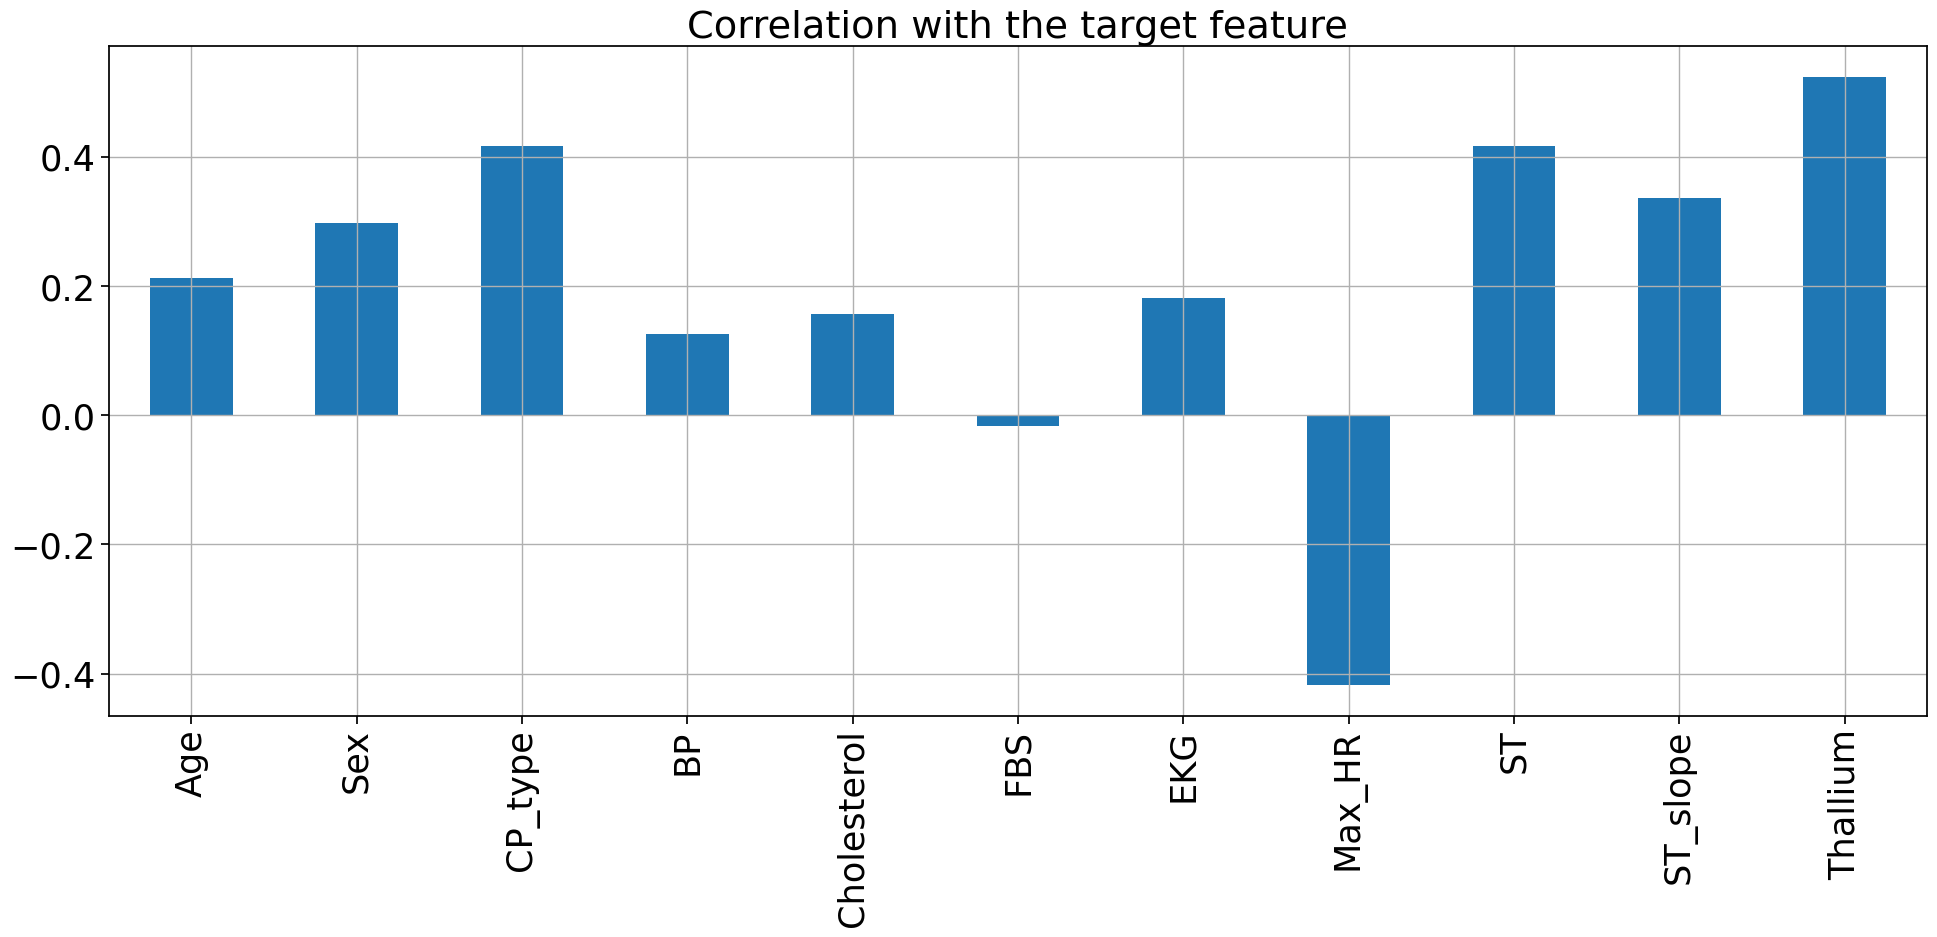

In [ ]:
sns.set_context('notebook',font_scale=2.3)
df.drop('target',axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20,10), title="Correlation with the target feature")
plt.tight_layout()

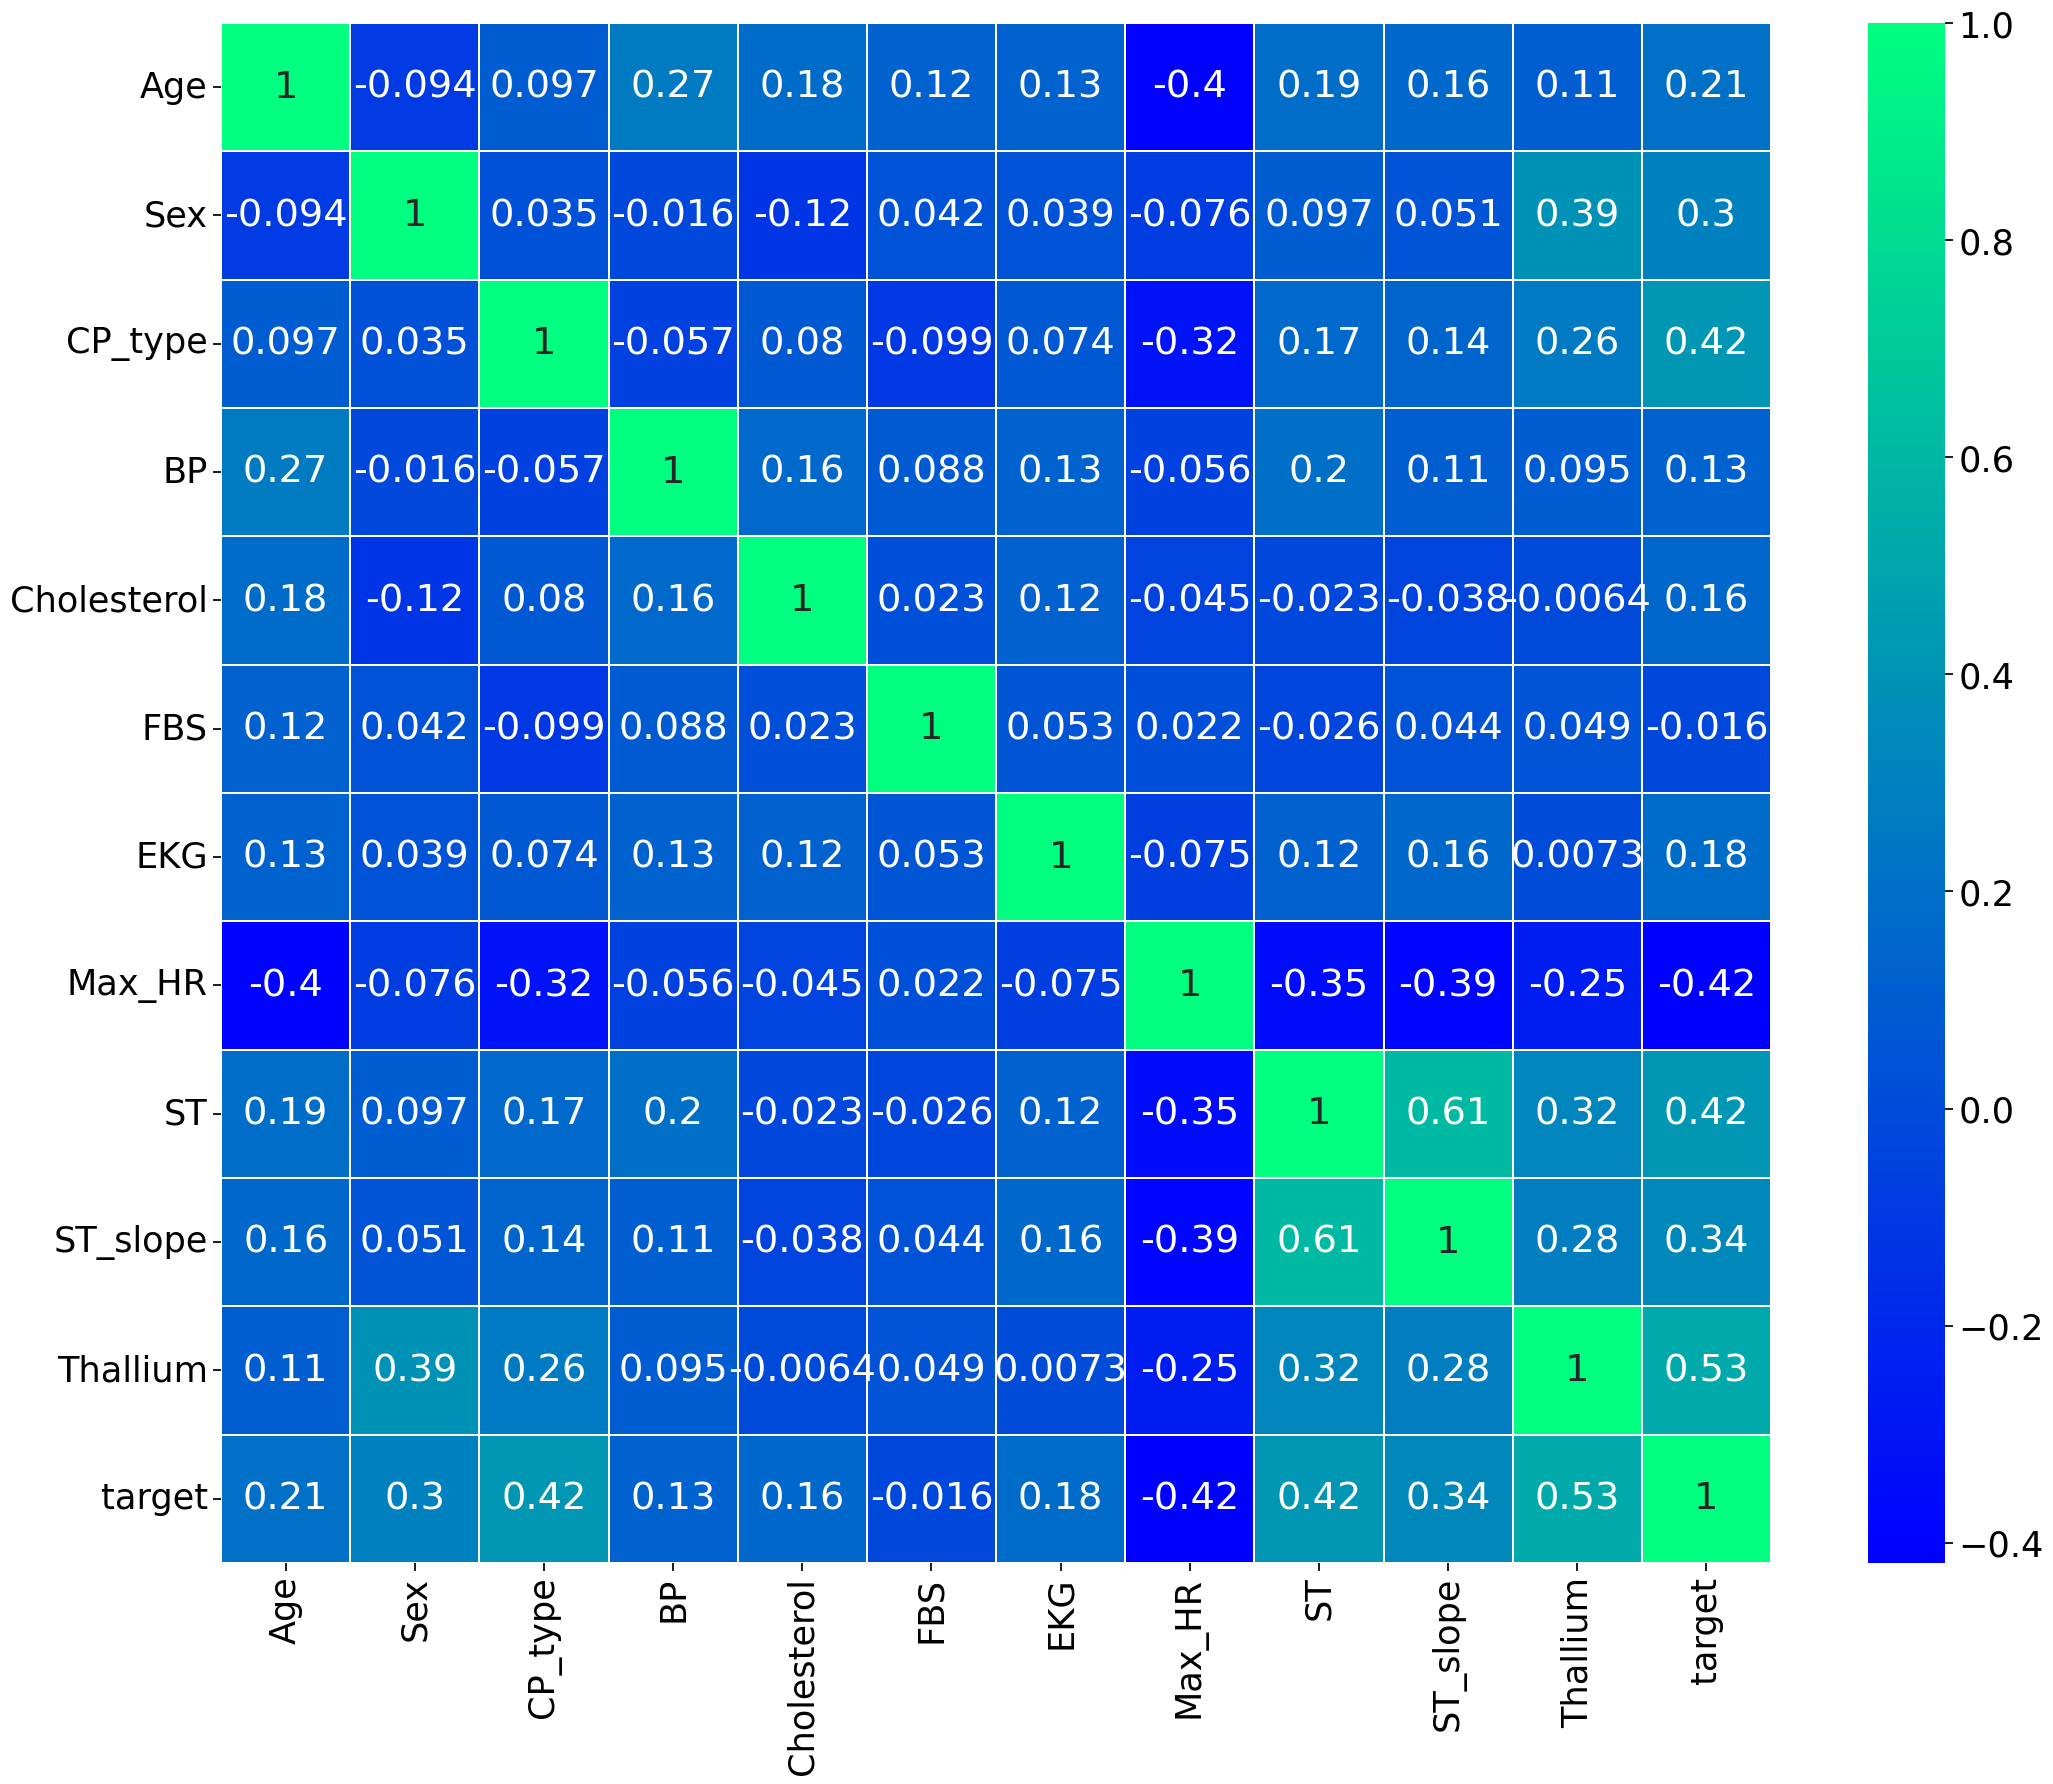

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

AGE ANALYSIS

In [ ]:
pd.crosstab(df["target"],df["Sex"])

Sex,0,1
target,,
0,67,83
1,20,100


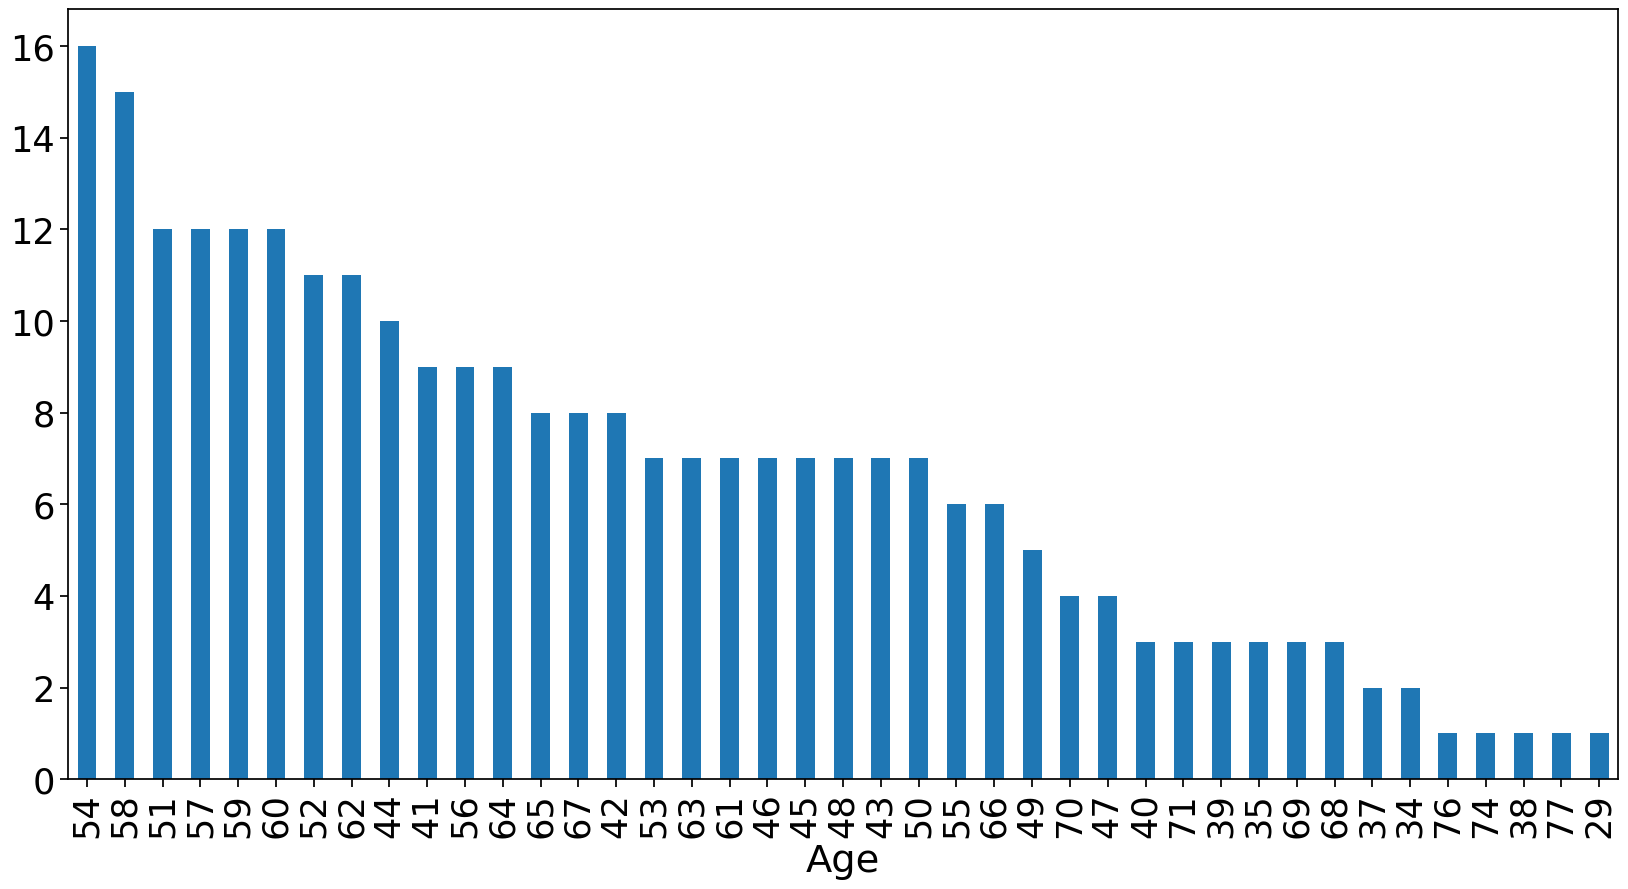

In [ ]:
plt.figure(figsize=(20,10))
df['Age'].value_counts().plot.bar()
plt.show()

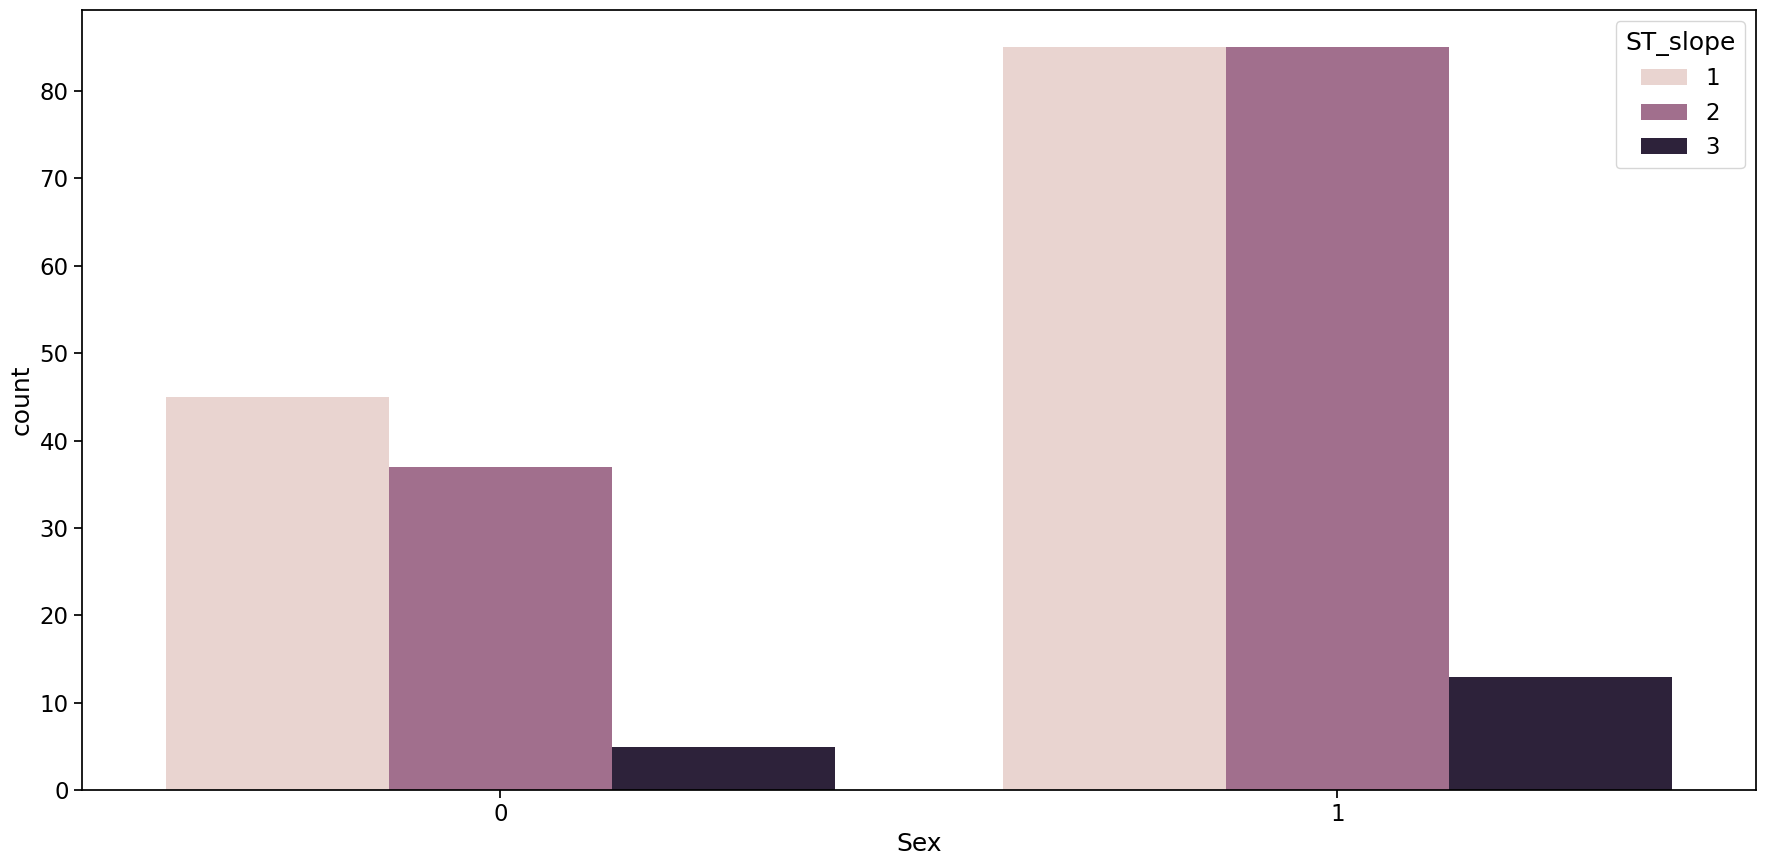

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['Sex'], hue=df['ST_slope'], data=df)
plt.tight_layout()

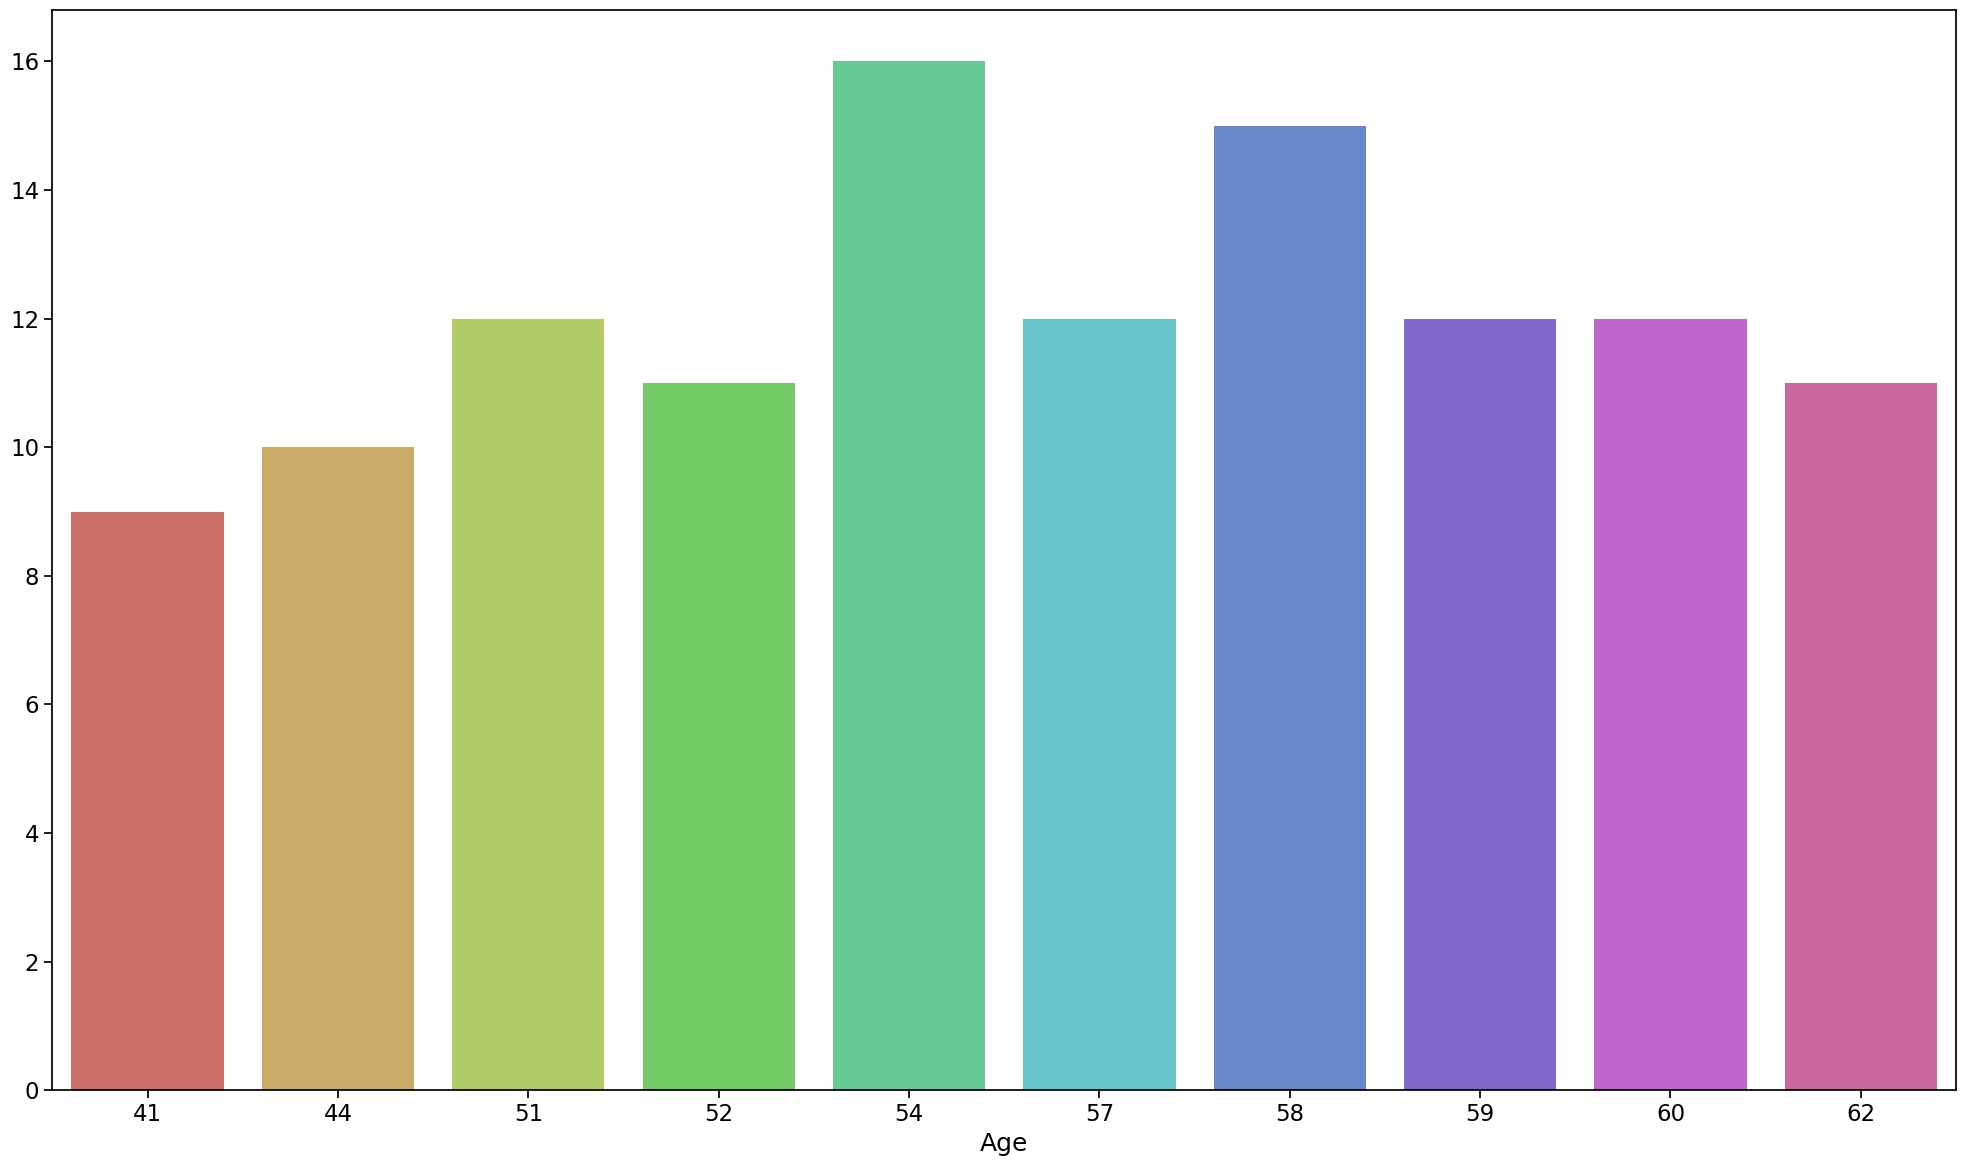

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=df.Age.value_counts()[:10].index, y=df.Age.value_counts()[:10].values, palette='hls')
plt.tight_layout()

In [ ]:
minAge = min(df.Age)
maxAge = max(df.Age)
meanAge = df.Age.mean()
print('Min Age:',minAge)
print('Max Age:',maxAge)
print('Mean Age:',meanAge)

Min Age: 29
Max Age: 77
Mean Age: 54.43333333333333


In [ ]:
Young = df[(df.Age>=29)&(df.Age<40)]
Middle = df[(df.Age>=40)&(df.Age<55)]
Elder = df[(df.Age>55)]

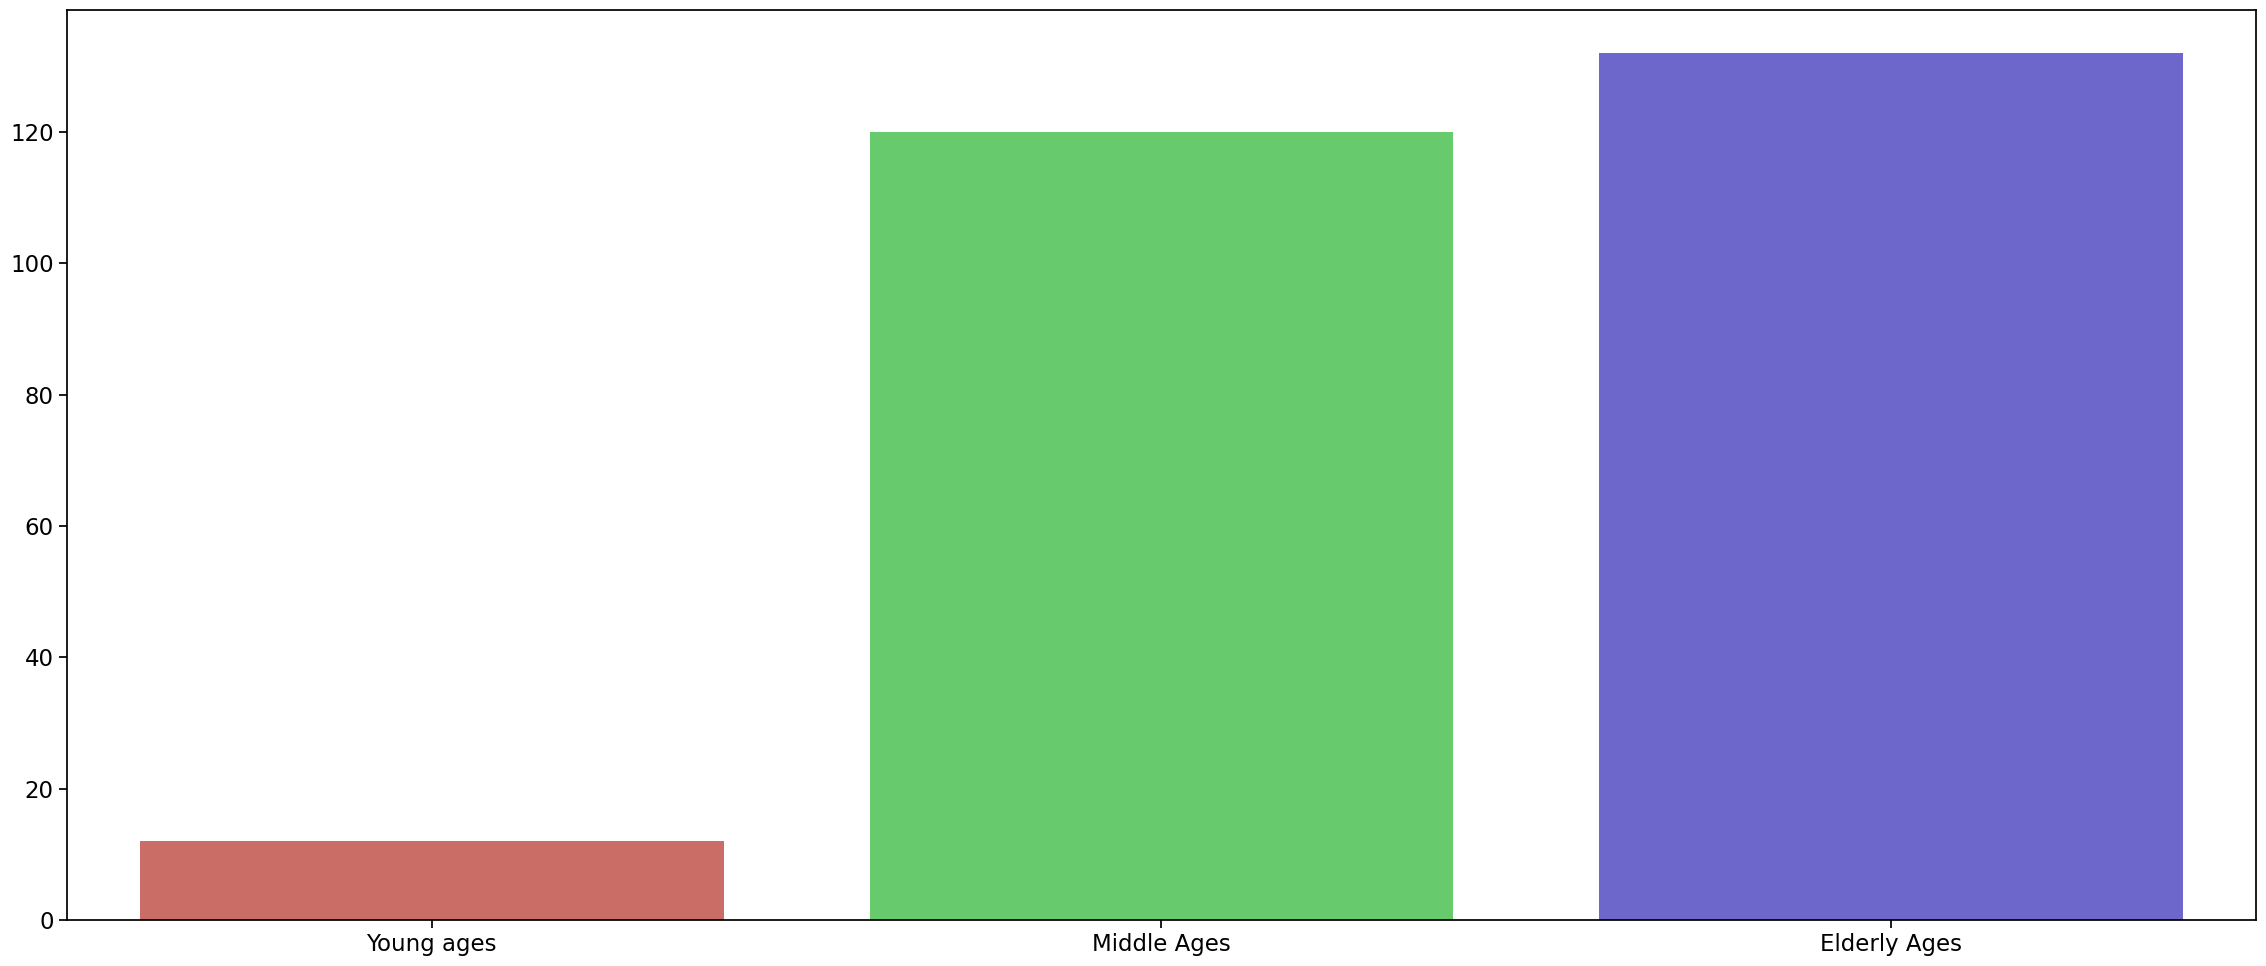

In [ ]:
plt.figure(figsize=(23,10))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=['Young ages', 'Middle Ages', 'Elderly Ages'], y=[len(Young), len(Middle), len(Elder)], palette='hls')
plt.tight_layout()

CP ANALYSIS

In [ ]:
ct=pd.crosstab(df["CP_type"],df["target"])
ct

target,0,1
CP_type,,
1,15,5
2,35,7
3,62,17
4,38,91


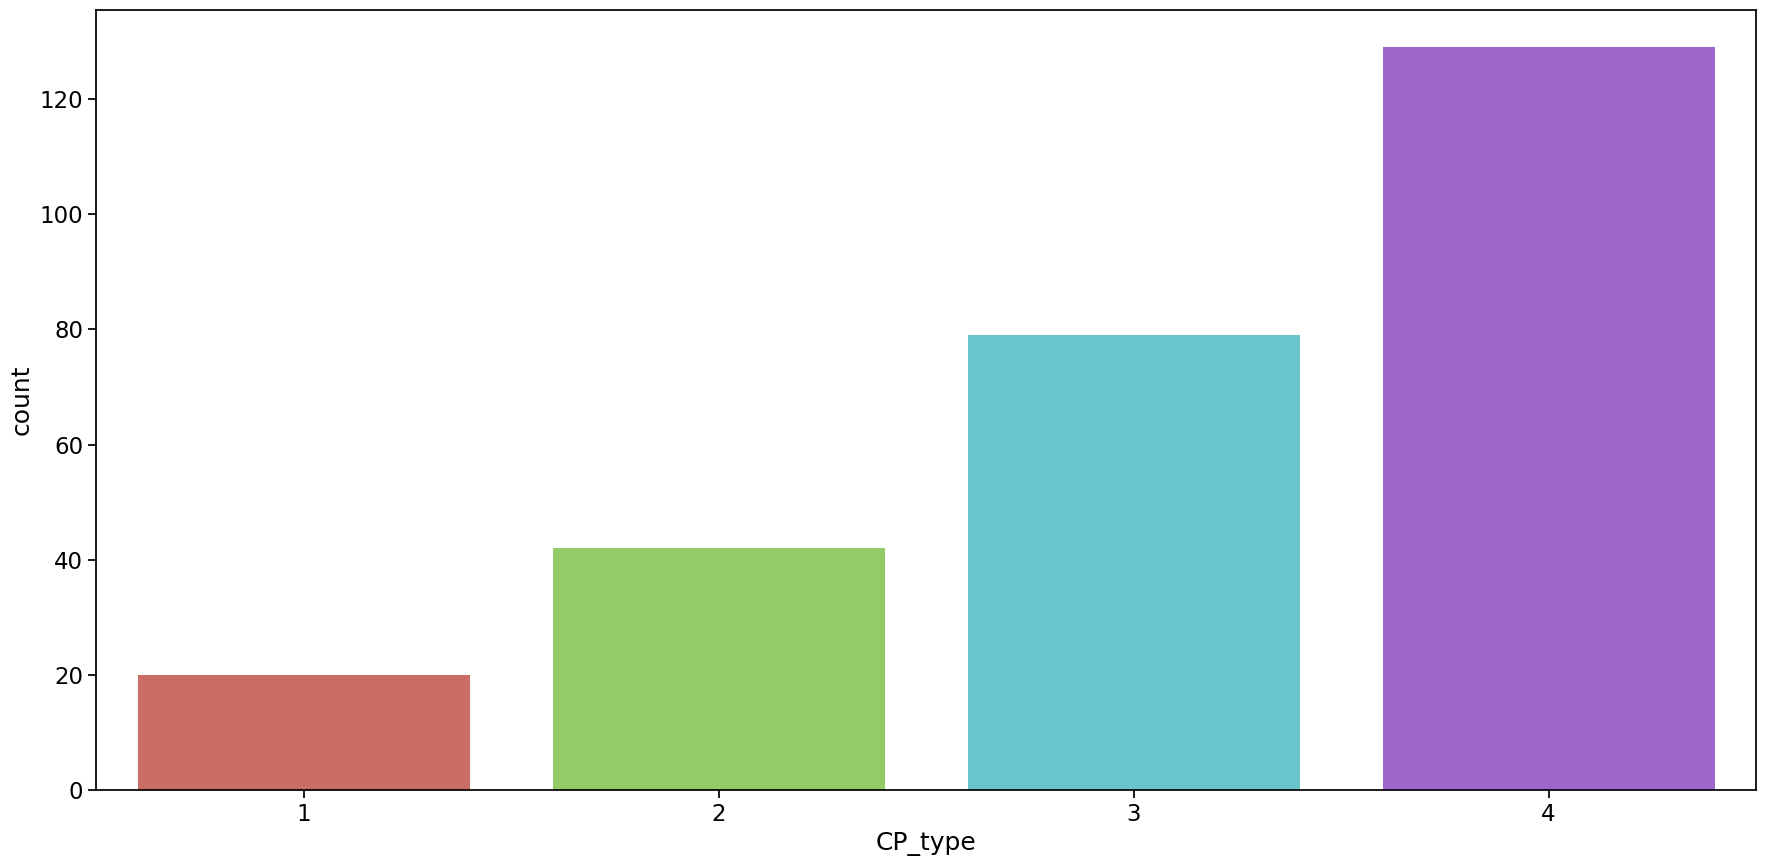

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['CP_type'], palette='hls')
plt.tight_layout()

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

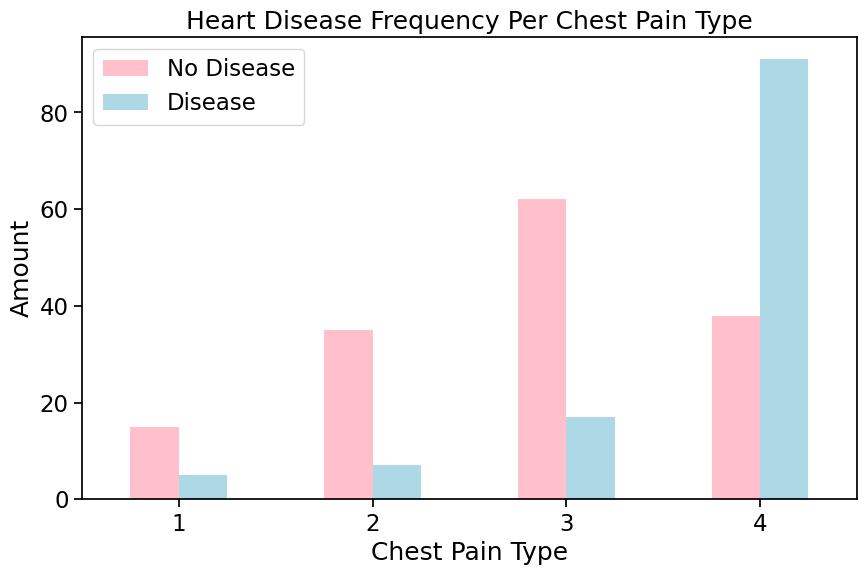

In [ ]:
ct.plot(kind="bar",figsize=(10,6),color=["pink","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

THALLIUM

In [ ]:
th=pd.crosstab(df["Thallium"],df["target"])
th


target,0,1
Thallium,,
3,119,33
6,6,8
7,25,79


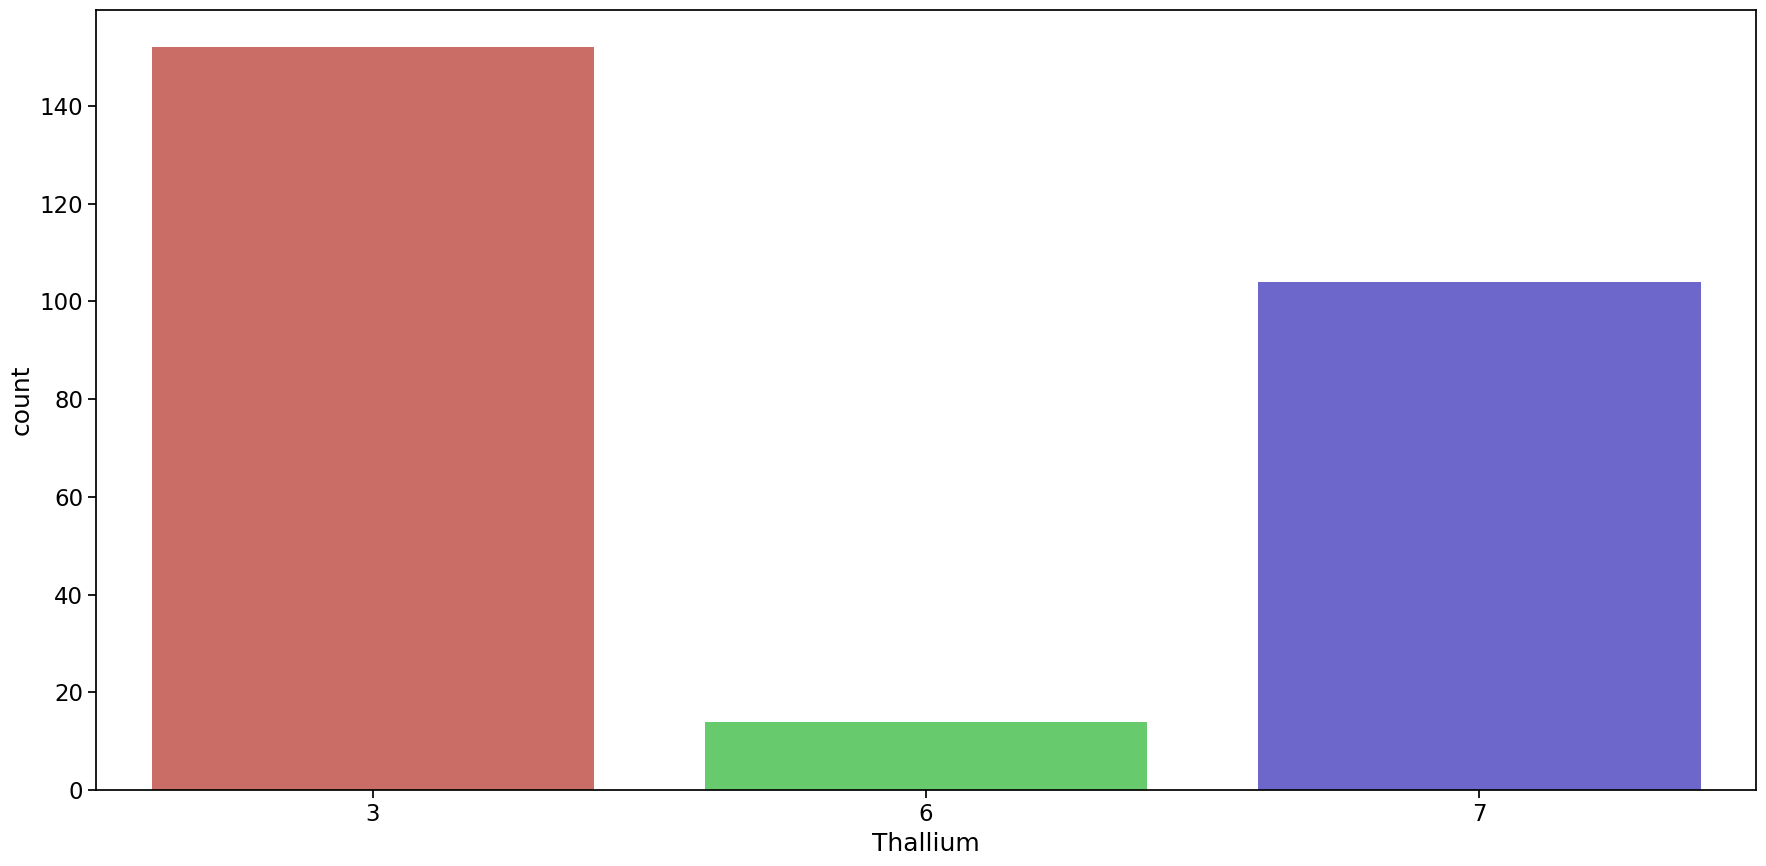

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(x=df['Thallium'], palette='hls')
plt.tight_layout()

(array([0, 1, 2]), [Text(0, 0, '3'), Text(1, 0, '6'), Text(2, 0, '7')])

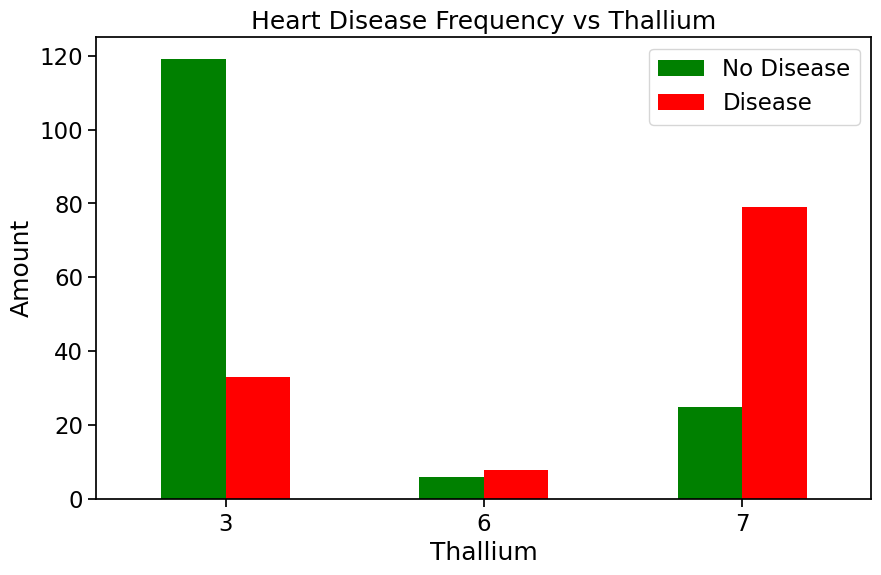

In [ ]:
th.plot(kind="bar",figsize=(10,6),color=["green","red"])
plt.title("Heart Disease Frequency vs Thallium")
plt.xlabel("Thallium")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [ ]:
def condition_ratio(data):
    """
    Make a pie chart of 'Condition' values
    Condition: 0 = Benign, 1 = Malignant
    """
    results = df['target'].value_counts()
    values = [results[0], results[1]]
    labels = ['Benign', 'Malignant']
    colors = ['MediumSeaGreen', 'Coral']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py


condition_ratio(df)


<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

Most of tumors are diagnosed with Malignant, 54.5% (165 cases). On the other hand, the proportion of Benign in Condition is less than 50%.

In [ ]:
def sex_ratio(data):
    """
    Make a pie chart of 'Sex' values
    Sex: 0 = Female, 1 = Male
    """

    results = data['Sex'].value_counts()
    values = [results[0], results[1]]
    labels = ['Female', 'Male']
    colors = ['Red', 'RoyalBlue']

    fig_pie = go.Pie(labels=labels, values=values,
                     marker={'colors': colors,
                             'line': {'color': 'Black', 'width': 2}})
    py.iplot([fig_pie])
    return py

sex_ratio(df)

<module 'plotly.offline' from '/usr/local/lib/python3.10/dist-packages/plotly/offline/__init__.py'>

The number of Male population are two times of Female population.

#Model Building

TRAIN TEST SPLIT
    
    Let’s split our dataset into a 75:25 train and test ratio.

In [ ]:
df['target'].value_counts()
X = df.drop(columns='target', axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [ ]:
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

LOGISTIC REGRESSION

In [ ]:
model1 = LogisticRegression(random_state=1)
model1.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [ ]:
pred1 = model1.predict(X_test)
pred1

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
cm1 = confusion_matrix(y_test,pred1)
cm1

array([[33,  7],
       [11, 17]])

In [ ]:
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.7352941176470589
Testing Sensitivity for Logistic Regression: 0.75
Testing Specificity for Logistic Regression: 0.7083333333333334
Testing Precision for Logistic Regression: 0.825


<Axes: >

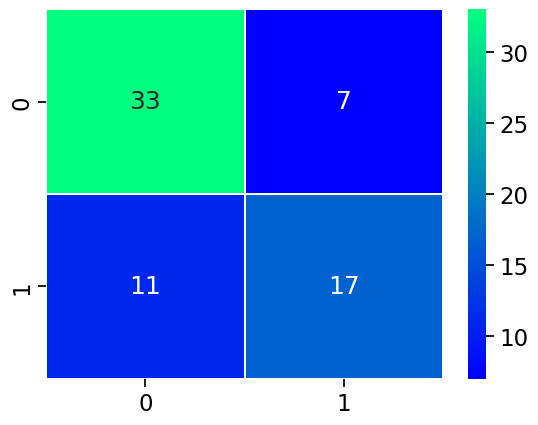

In [ ]:
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.79        40\n           1       0.71      0.61      0.65        28\n\n    accuracy                           0.74        68\n   macro avg       0.73      0.72      0.72        68\nweighted avg       0.73      0.74      0.73        68\n'

**Inference:**

From the above report, we get the accuracy of the Logistic Regression classifier is about 80%

DECISION TREE CLASSIFIER

In [ ]:
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
pred2 = model2.predict(X_test)
pred2

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
cm2 = confusion_matrix(y_test,pred1)
cm2

array([[33,  7],
       [11, 17]])

In [ ]:
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.7352941176470589
Testing Sensitivity for Logistic Regression: 0.75
Testing Specificity for Logistic Regression: 0.7083333333333334
Testing Precision for Logistic Regression: 0.825


<Axes: >

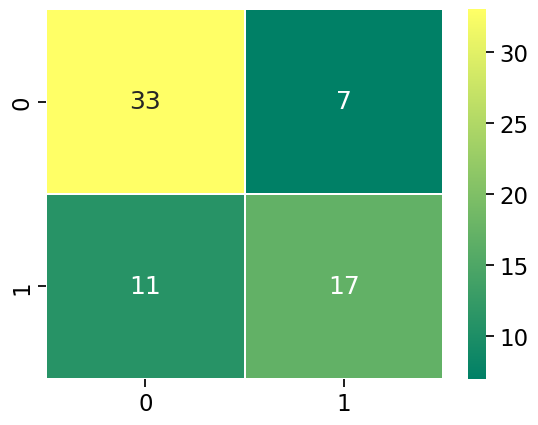

In [ ]:
sns.heatmap(cm1, annot=True,cmap='summer',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.79        40\n           1       0.71      0.61      0.65        28\n\n    accuracy                           0.74        68\n   macro avg       0.73      0.72      0.72        68\nweighted avg       0.73      0.74      0.73        68\n'

**Inference:**

From the above report, we get the accuracy of the Decision Tree classifier is about 92%.

RANDOM FOREST CLASSIFIER

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred3 = model3.predict(X_test)
pred3

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0])

In [ ]:
cm3 = confusion_matrix(y_test,pred1)
cm3

array([[33,  7],
       [11, 17]])

In [ ]:
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.7352941176470589
Testing Sensitivity for Logistic Regression: 0.75
Testing Specificity for Logistic Regression: 0.7083333333333334
Testing Precision for Logistic Regression: 0.825


<Axes: >

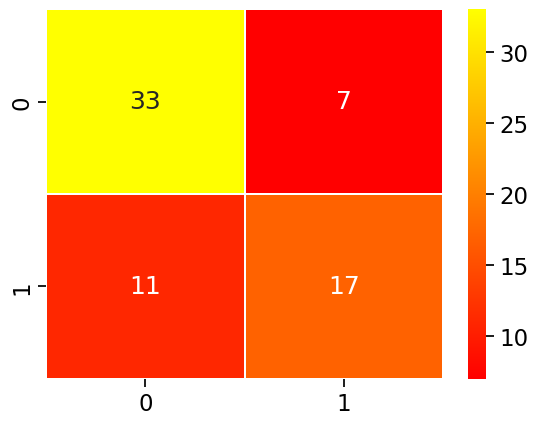

In [ ]:
sns.heatmap(cm1, annot=True,cmap='autumn',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.79        40\n           1       0.71      0.61      0.65        28\n\n    accuracy                           0.74        68\n   macro avg       0.73      0.72      0.72        68\nweighted avg       0.73      0.74      0.73        68\n'

**Inference:**

From the above report, we can get the accuracy of the Random Forest classifier is about 80%

SUPPORT VECTOR MACHINE

In [ ]:
model4 =SVC()
model4.fit(X_train, y_train)

SVC()

In [ ]:
pred4 = model4.predict(X_test)
pred4

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0])

In [ ]:
cm4 = confusion_matrix(y_test,pred1)
cm4

array([[33,  7],
       [11, 17]])

In [ ]:
TP=cm4[0][0]
TN=cm4[1][1]
FN=cm4[1][0]
FP=cm4[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.7352941176470589
Testing Sensitivity for Logistic Regression: 0.75
Testing Specificity for Logistic Regression: 0.7083333333333334
Testing Precision for Logistic Regression: 0.825


<Axes: >

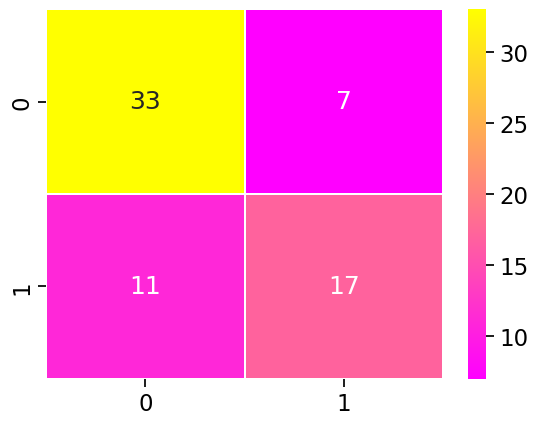

In [ ]:
sns.heatmap(cm1, annot=True,cmap='spring',linewidths=0.3, linecolor='white')

In [ ]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.82      0.79        40\n           1       0.71      0.61      0.65        28\n\n    accuracy                           0.74        68\n   macro avg       0.73      0.72      0.72        68\nweighted avg       0.73      0.74      0.73        68\n'

**Inference:**

From the above report, we get the accuracy of the Support Vector Machine classifier is about 82%

---
*From the final results, we can conclude that the Decision Tree algorithm is the best algorithm for our model with the highest accuracy around 92 percent.*

---

#Ensemble Techniques

>Max Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
vote.fit(X_train,y_train)
vote.score(X_test,y_test)

0.7205882352941176

>Averaging

In [ ]:
model1 = tree.DecisionTreeClassifier()
model6 = KNeighborsClassifier()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model6.fit(X_train,y_train)

pred_1 =model1.predict_proba(X_test)
pred_2 =model2.predict_proba(X_test)
pred_6 =model6.predict_proba(X_test)

finalpred=(pred_1+pred_2+pred_6)/3
finalpred[:10]

array([[0.86666667, 0.13333333],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [0.8       , 0.2       ],
       [0.73333333, 0.26666667],
       [0.8       , 0.2       ]])

>Weighted Average

In [ ]:
finalpred=(pred_6*0.3+pred_2*0.3+pred_1*0.4)
finalpred[:10]

array([[0.88, 0.12],
       [0.18, 0.82],
       [0.  , 1.  ],
       [0.3 , 0.7 ],
       [0.82, 0.18],
       [1.  , 0.  ],
       [0.18, 0.82],
       [0.82, 0.18],
       [0.76, 0.24],
       [0.82, 0.18]])

#Model Evaluation

**CASE-1 :** For heart disease data

In [ ]:
input = (63,3,145,233,150,2.3,0,13,44,7.9,19.99)
input_as_numpy = np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)
pre1 = model2.predict(input_reshaped)
if(pre1 == 1):
  print("The patient seems to be have heart disease :(")
else:
  print("The patient seems to be Normal :)")


The patient seems to be have heart disease :(


**CASE-2 :** For normal data

In [ ]:
input=(150,1,120,20,72,1,125,200,150,1.3,1)
input_as_numpy = np.asarray(input)
input_reshaped = input_as_numpy.reshape(1,-1)
pre1 = model2.predict(input_reshaped)
if(pre1 == 1):
  print("The patient seems to be have heart disease :(")
else:
  print("The patient seems to be Normal :)")

The patient seems to be Normal :)


#Conclusion


>Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays. From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the Decision Tree Algorithm, thereby making accurate heart disease prediction using machine learning.
